<h1><center> Traitement d'images avec OpenCv </center></h1>


## 1. Installer la bibliothèque opencv


commande: pip install opencv-python

## 2. Importer la bibliothèque

In [108]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## 1. Lire une image et afficher son type

In [10]:
radiog = cv2.imread('genou.jpg')
daria = cv2.imread('daria.png')
ble = cv2.imread('ble.jpg')
lena = cv2.imread('lena.jpg')

In [11]:
radiog.dtype

dtype('uint8')

In [12]:
daria.dtype

dtype('uint8')

## 2. Afficher cette image et sa taille

In [13]:
cv2.imshow("genou", radiog)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [14]:
cv2.imshow("daria", daria)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [15]:
cv2.imshow("ble", ble)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [16]:
print("Daria :", daria.shape, "Radio du genou :", radiog.shape, "Champ de blé :", ble.shape)

Daria : (320, 512, 3) Radio du genou : (705, 900, 3) Champ de blé : (576, 1024, 3)


## 3. Rotation de l'image

Pour faire la rottation cette image, vous avez besoin de sa largeur et sa hauteur:

In [17]:
#Récuperation de la largeur et la hauteur
print("largeur :", daria.shape[1], "px")
print("hauteur :", daria.shape[0], "px")

largeur : 512 px
hauteur : 320 px


Pour obtenir la matrice de rotation, nous utilisons la méthode getRotationMatrix2D () de cv2. Pour faire la rotation, nous avons une méthode wrapAffine de cv2 qui prend l'image d'origine, la matrice de rotation de l'image et la largeur et la hauteur de l'image comme arguments.

In [18]:
transfoMatrix = cv2.getRotationMatrix2D((daria.shape[1]//2, daria.shape[0]//2), 180, 1) 
# centre de rotation, angle, echelle

In [19]:
newdaria = cv2.warpAffine(daria, transfoMatrix, None)

## 4. Recadrer une image

Récupérez l'index de début et de fin de la ligne et de la colonne. Cela définira la taille de l'image nouvellement créée. Par exemple, commencer de la ligne numéro 10 jusqu'à la ligne numéro 15 donnera la hauteur de l'image. De même, commencez à partir de la colonne numéro 10 jusqu'à ce que la colonne numéro 15 donne la largeur de l'image.

In [20]:
newdariacropped = newdaria[:,100:412]

In [21]:
cv2.imshow("airad", newdariacropped)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 5. Redimensionner une image

Pour redimensionner une image, vous pouvez utiliser la méthode resize() d'openCV. Dans cette méthode, vous pouvez spécifier les valeurs des axes x et y ou le nombre de lignes et de colonnes qui indique la taille de l'image.

In [22]:
newradio = cv2.resize(radiog, , interpolation = cv2.INTER_CUBIC)

In [23]:
cv2.imshow("petite", newradio)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [24]:
print(radiog.shape)
print(newradio.shape)

(705, 900, 3)
(352, 450, 3)


## 6. Ajuster le contraste de l'image

Dans le module OpenCV, il n'y a pas de fonction particulière pour ajuster le contraste de l'image mais la documentation officielle d'OpenCV suggère une équation qui peut ajuster la luminosité de l'image et le contraste de l'image à la fois:

Image= a*Image + b

Avec a qui définit le contraste de l'image. Si a est supérieur à 1, le contraste sera plus élevé. Si la valeur de a est comprise entre 0 et 1 (inférieure à 1 mais supérieure à 0), le contraste serait plus faible. Si a vaut 1, il n'y aura aucun effet de contraste sur l'image.

b un paramètre d'ajustement qui varie de -127 à +127.

Utilisez la fonction addWeighted() pour faire cette transformation.


In [134]:
new_radiog = np.clip(0.4*radiog-44, 0., 1.)

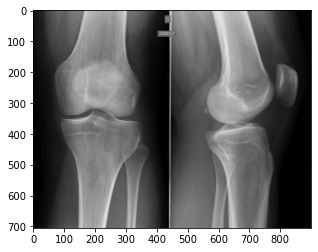

In [135]:
plt.imshow(radiog)

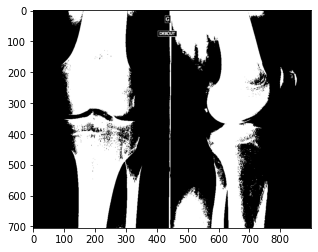

In [136]:
plt.imshow(new_radiog)

## 7. Rendre une image floue

Pour rendre une image floue, utiliser les deux méthodes GaussianBlur() et medianBlur() de opencv

In [25]:
# Avec GaussianBlur()
dariafloue = cv2.GaussianBlur(daria, (5, 5), 3) # filtre gaussien de taille 5 x 5 et d'écart-type 3.

In [26]:
cv2.imshow("gaussian blur", dariafloue)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [27]:
# Avec medianBlur()
dariafloue2 = cv2.medianBlur(daria, 9) # utilise la médiane sur un voisinage 9

In [28]:
cv2.imshow("median blur", dariafloue2)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 8. Detecter les contours

Pour détecter les contours dans une image, vous pouvez utiliser la méthode Canny () de cv2 qui implémente le détecteur de bord Canny. Le détecteur de bord Canny est également connu comme le détecteur le plus optimal.

In [29]:
contoursble = cv2.Canny(ble, 100, 300)

In [30]:
cv2.imshow("canny", contoursble)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 9. Convertir une image en niveau de gris

Essayer de convertir une image en niveau de gris en utilisant les deux méthodes:  avec la méthode imread() et avec la méthode cvtColor()

In [31]:
bwble = cv2.cvtColor(ble, cv2.COLOR_BGR2GRAY)

## 10. Les canneaux Rouge, Vert, Bleu

Récuperer les canneaux rouge, Vert et bleu de l'image originale et affichez les.

In [32]:
(b, g, r) = cv2.split(daria)
# b = cv2.split(daria)[0]
# g = cv2.split(daria)[1]
# r = cv2.split(daria)[2]

In [33]:
cv2.imshow("rouge", r)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [34]:
cv2.imshow("vert", g)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [35]:
cv2.imshow("blau", b)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 11. Détection du centre de gravité de l'image

Pour trouver le centre d'une image, la première étape consiste à convertir l'image d'origine en niveaux de gris. Calculer les moments de l'image. Utilisez la méthode moments () de cv2. Ensuite, nous devons calculer les coordonnées x et y du centre de l'image en utilisant les moments que nous avons obtenus. Dessinez un cercle sur ce centre.

In [36]:
degrade = cv2.imread("degrade.jpg")
degrade.shape

(1000, 1000, 3)

In [37]:
degrade = cv2.cvtColor(degrade, cv2.COLOR_BGR2GRAY)

In [38]:
degrade = cv2.resize(degrade, None, fx = 0.3, fy = 0.3)

In [39]:
M = cv2.moments(degrade)
M

{'m00': 10991014.0,
 'm10': 1949600630.0,
 'm01': 1956664630.0,
 'm20': 419747728422.0,
 'm11': 338395738563.0,
 'm02': 421860422602.0,
 'm30': 98393509743146.0,
 'm21': 72122889877741.0,
 'm12': 72227921544773.0,
 'm03': 98962717668742.0,
 'mu20': 73924984815.59602,
 'mu11': -8680026725.509018,
 'mu02': 73527095550.18869,
 'mu30': -2287722189690.4844,
 'mu21': 477056055562.7486,
 'mu12': 488267395082.2716,
 'mu03': -2317755827293.4917,
 'nu20': 0.0006119496938896416,
 'nu11': -7.185310502097701e-05,
 'nu02': 0.000608655973711337,
 'nu30': -5.712272039689653e-06,
 'nu21': 1.191173464958352e-06,
 'nu12': 1.219167345313861e-06,
 'nu03': -5.787263797475174e-06}

In [40]:
cX = int(M["m10"] / M["m00"])
cY = int(M["m01"] / M["m00"])

cv2.circle(degrade, (cX, cY), 5, (255, 255, 255), -1)

array([[  0,   0,   0, ..., 120, 120, 121],
       [  0,   0,   0, ..., 120, 121, 121],
       [  0,   0,   0, ..., 121, 121, 122],
       ...,
       [123, 123, 123, ..., 255, 255, 255],
       [123, 124, 125, ..., 255, 255, 255],
       [124, 124, 125, ..., 255, 255, 255]], dtype=uint8)

In [41]:
cv2.imshow("moment", degrade)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 12. Extraction de texte à partir d'une image (OCR)

Pour extraire du texte à partir d'une image, vous pouvez utiliser Google Tesseract-OCR. Vous pouvez le télécharger à partir de ce lien: https://digi.bib.uni-mannheim.de/tesseract/tesseract-ocr-setup-3.05.02-20180621.exe

Ensuite, vous devez installer le module pytesseract sur Anaconda qui est un wrapper Python pour Tesseract-OCR.

In [42]:
import pytesseract
from PIL import Image

In [43]:
imgtext = cv2.imread('text.jpg')

In [44]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files (x86)\Tesseract-OCR\tesseract.exe'

In [45]:
print(pytesseract.image_to_string(imgtext))

It was the best of
times, it was the worst
of times, it was the age
of wisdom, it was the
age of foolishness...




## 13. Réduire le bruit pour une image couleur et en niveau de gris

In [77]:
noise = cv2.imread('noiz.jpg')
denoised = cv2.fastNlMeansDenoisingColored(noise, None, 10, 10, 7, 15) 

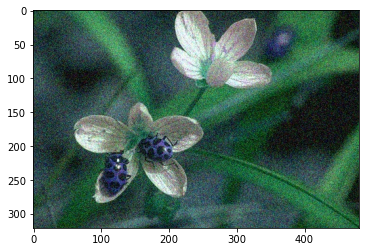

In [104]:
plt.imshow(noise)

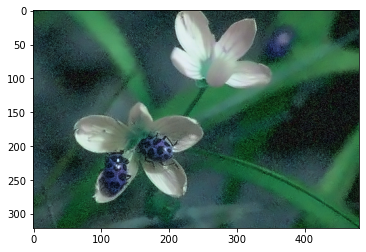

In [105]:
plt.imshow(denoised)

## 14. Detection des visages avec la méthode de Viola et Jones

Pour une image donnée, tracer un rectangle sur les visages détectés sur l'image. Cropper le visage détécté et enregistrer le dans un fichier .png

Refaites la même procédure sur une image avec plusieurs visages.

In [55]:
img = cv2.imread('gens.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [56]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

In [ ]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)


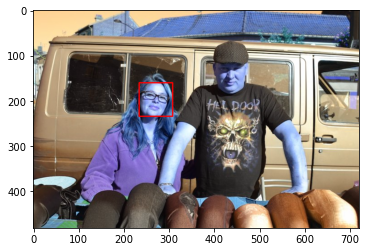

In [106]:
plt.imshow(img) 


[autres exemples](http://www.python-simple.com/python-opencv)

https://github.com/opencv/opencv/tree/master/data